# Classifieur bayésien

In [390]:
import pandas as pa
import numpy as np

dataset = pa.read_csv("https://www.labri.fr/perso/zemmari/datasets/salmon_seabass.csv", sep=";")
df = pa.DataFrame(dataset)

df.head()

,lightness,width,species
0,9.710457,8.673699,0
1,6.528089,7.330887,0
2,1.770695,7.599677,0
3,4.819293,7.328198,0
4,6.769638,8.575629,0


In [391]:
# class = data type
# col `species` is class
# 0 : il s'agit d'un saumon
# 1 : il s'agit d'un bar

sizeVTSaumon = np.count_nonzero(df["species"] == 0)
sizeVTBar = np.count_nonzero(df["species"] == 1)

print("Saumon :", sizeVTSaumon, "Bar :", sizeVTBar)

Saumon : 1000 Bar : 500


## Exercice 1

In [392]:
data = df.sample(frac=1)

In [393]:
X = data["width"]
Y = data["species"]

In [394]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=1)
print(len(X_train), str(len(X_train) * 100 / len(X)) + "%")
print(len(X_test), str(len(X_test) * 100 / len(X)) + "%")

1200 80.0%
300 20.0%


### Classifieur ML

In [395]:
# mean is average in statistics (la moyenne)
meanSaumon = np.mean(X_train[Y_train == 0])
meanBar = np.mean(X_train[Y_train == 1])

# l'écart type = standard deviation, the variance : a measure of the spread of a distribution, of the array elements.
stdSaumon = np.std(X_train[Y_train == 0], 0)
stdBar = np.std(X_train[Y_train == 1], 0)
print(meanSaumon, meanBar, stdSaumon, stdBar)

8.04079118103203 12.071244336215804 1.0044591938917353 2.071049259893676


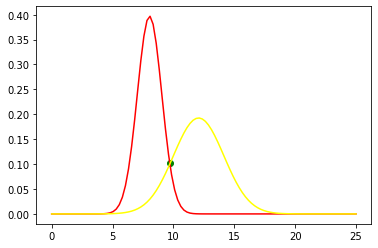

In [396]:
%matplotlib inline
import matplotlib.pyplot as plt
import scipy.stats as ss
norm = ss.norm # normal low package

x = np.linspace(0, 25, 100)

yn = norm.pdf(x, meanSaumon, stdSaumon)
plt.plot(x, yn, c="red")

yn = norm.pdf(x, meanBar, stdBar)
plt.plot(x, yn, c="yellow")

plt.scatter(9.75, norm.pdf(9.75, meanBar, stdBar), c="green")

- La frontière de décision est 9.75

In [397]:
width = 12
if norm.pdf(width, meanSaumon, stdSaumon) > norm.pdf(width, meanBar, stdBar) :
  print("Saumon")
else:
  print("Bar")

Bar


- Un poisson de longueur 12 est un bar

In [398]:
from sklearn.metrics import confusion_matrix

Y_pred = [norm.pdf(x, meanSaumon, stdSaumon) < norm.pdf(x, meanBar, stdBar) for x in X_test]

cm = confusion_matrix(Y_test, Y_pred)
print(cm)
acc = np.sum(np.diag(cm))/np.sum(cm)

print("{:.2%}".format(acc))

[[190   8]
 [ 13  89]]
93.00%


### Classifieur MAP

la vraisemblance de l c'est $\mathbb{P}(l| saumon)$

la probabilités a posteriori (map) = le plus grand entre $\mathbb{P}(saumon|l)=\frac{\mathbb{P}(l| saumon) \cdot\mathbb{P}(saumon)}{\mathbb{P}(l)}$ et $\frac{\mathbb{P}(l|bar) \cdot\mathbb{P}(bar)}{\mathbb{P}(l)}$ donc le plus grand entre $\mathbb{P}(l| saumon) \cdot\mathbb{P}(saumon)$ et $\mathbb{P}(l|bar) \cdot\mathbb{P}(bar)$

In [399]:
def classify(l):
  vraisemblanceSaumon = (1/np.sqrt(2*np.pi))*np.exp((-(l-5)**2)/2)
  vraisemblanceBar = (1/(2*np.sqrt(2*np.pi)))*np.exp((-(l-10)**2)/8)
  probaSaumon = 2/3
  probaBar = 1/3

  return vraisemblanceSaumon * probaSaumon < vraisemblanceBar * probaBar


In [400]:
if classify(12):
  print("Bar")
else:
  print("Saumon")

Bar


In [401]:
Y_pred = [classify(x) for x in X]

cm = confusion_matrix(Y, Y_pred)
print(cm)
acc = np.sum(np.diag(cm))/np.sum(cm)

print("{:.2%}".format(acc))

[[197 803]
 [  4 496]]
46.20%


## Exercice 2

In [402]:
X = data[["width", "lightness"]]
Y = data["species"]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=1)
print(len(X_train), str(len(X_train) * 100 / len(X)) + "%")
print(len(X_test), str(len(X_test) * 100 / len(X)) + "%")

1200 80.0%
300 20.0%


### Classifieur ML

In [403]:
# mean is average in statistics (la moyenne)
meanSaumon = np.mean(X_train[Y_train == 0])
meanBar = np.mean(X_train[Y_train == 1])

# l'écart type = standard deviation, the variance : a measure of the spread of a distribution, of the array elements.
stdSaumon = np.std(X_train[Y_train == 0], 0)
stdBar = np.std(X_train[Y_train == 1], 0)

print(meanSaumon, meanBar, stdSaumon, stdBar)
meanSaumon = np.mean(meanSaumon)
meanBar = np.mean(meanBar)
stdSaumon = np.std(stdSaumon)
stdBar = np.std(stdBar)
print(meanSaumon, meanBar, stdSaumon, stdBar)

width        8.040791
lightness    4.985390
dtype: float64 width        12.071244
lightness    10.865446
dtype: float64 width        1.004459
lightness    1.832178
dtype: float64 width        2.071049
lightness    3.930123
dtype: float64
6.513090726716066 11.468345384910592 0.41385924298261634 0.9295366375564167


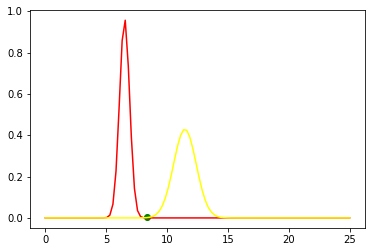

In [404]:
%matplotlib inline
import matplotlib.pyplot as plt

x = np.linspace(0, 25, 100)

yn = norm.pdf(x, meanSaumon, stdSaumon)
plt.plot(x, yn, c="red")

yn = norm.pdf(x, meanBar, stdBar)
plt.plot(x, yn, c="yellow")

plt.scatter(8.35, norm.pdf(8.7, meanBar, stdBar), c="green")

In [405]:

width = 12
if norm.pdf(width, meanSaumon, stdSaumon) > norm.pdf(width, meanBar, stdBar) :
  print("Saumon")
else:
  print("Bar")

Bar


Un poisson de longueur 12 est toujours un bar

In [406]:
print("Efficiency for width")
Y_pred = [norm.pdf(x, meanSaumon, stdSaumon) < norm.pdf(x, meanBar, stdBar) for x in X_test["width"]]

cm = confusion_matrix(Y_test, Y_pred)
print(cm)
acc = np.sum(np.diag(cm))/np.sum(cm)

print("{:.2%}".format(acc))

print("\n")

print("Efficiency for lightness")
Y_pred = [norm.pdf(x, meanSaumon, stdSaumon) < norm.pdf(x, meanBar, stdBar) for x in X_test["lightness"]]

cm = confusion_matrix(Y_test, Y_pred)
print(cm)
acc = np.sum(np.diag(cm))/np.sum(cm)

print("{:.2%}".format(acc))

Efficiency for width
[[109  89]
 [  2 100]]
69.67%


Efficiency for lightness
[[162  36]
 [ 25  77]]
79.67%


### Classifieur MAP

In [407]:
from sklearn.metrics import confusion_matrix

print("Efficiency for lightness")
Y_pred = [classify(np.mean(x)) for x in X["lightness"]]

cm = confusion_matrix(Y, Y_pred)
print(cm)
acc = np.sum(np.diag(cm))/np.sum(cm)

print("{:.2%}".format(acc))

print("\n")

print("Efficiency both")
Y_pred = [classify(np.mean(x)) for x in np.mean(X, axis=1)]

cm = confusion_matrix(Y, Y_pred)
print(cm)
acc = np.sum(np.diag(cm))/np.sum(cm)

print("{:.2%}".format(acc))

Efficiency for lightness
[[875 125]
 [ 93 407]]
85.47%


Efficiency both
[[743 257]
 [ 10 490]]
82.20%


## Exercice 3

In [408]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, Y_train)

GaussianNB()

In [409]:
print(nb.predict([[1.81, 59]])[0]) # TODO: fix

1


/home/charles/.local/lib/python3.8/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


https://jakevdp.github.io/PythonDataScienceHandbook/05.05-naive-bayes.html